### Step 1: Data Set Summary & Exploration

#### 1.1. Distribution: the sample data 

In [1]:
# Step 1: Data Set Summary & Exploration
# In[1]: --------------------------------------------
import numpy as np
import pandas
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
from sklearn.utils import shuffle
plt.style.use('ggplot')
#plt.imshow(img)
%matplotlib inline

# In[2]: --------------------------------------------
pathData0 = 'C:/Users/mo/home/_eSDC2_/_PRJ03_/_2_WIP/_171126-1433_BehavioralCloning/'
pathData1 = pathData0+'data/'
pathData2 = pathData1+'sample/'
pathData3 = pathData2+'IMG/'
pathData4 = pathData0+'logs/'
pathData5 = pathData4+'model/'
pathData6 = pathData4+'nn_logs/'

colnames = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']

# In[3]: --------------------------------------------
driving_log = pandas.read_csv(pathData2+'driving_log.csv', skiprows=[0], names=colnames)
center      = driving_log.center.tolist()
left        = driving_log.left.tolist()
right       = driving_log.right.tolist()
steering    = driving_log.steering.tolist()
throttle    = driving_log.throttle.tolist()
brake       = driving_log.brake.tolist()
speed       = driving_log.speed.tolist()

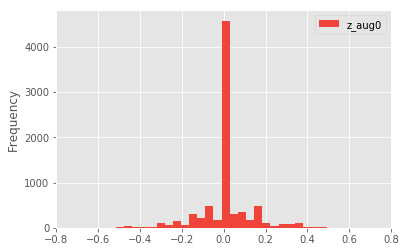

In [51]:
# In[4]: --------------------------------------------
dic0 = {'z_aug0': steering}
dfr0 = pandas.DataFrame( dic0, columns=['z_aug0'] )
plt.figure();
dfr0.plot.hist(xlim=(-0.8, 0.8), color='#F0433A', stacked=True, bins=50)

#### 1.2. Distribution: data augmentation - part 1

In [ ]:
# C:\Users\mo\home\_eSDC2_\_PRJ03_\_2_WIP\_171126-1433_BehavioralCloning\...
#   ...GitHub\_01_WIP\_Coding_\_1_pre-train\BSF_tools_171203-2024.py

In [2]:
# In[x]: --------------------------------------------   
shuffle(steering)
delta=0.2
angles = []
    
for angle in steering:
    # Import labels
    for i in range(3):
        if   i == 1: # images from the left
            angles.append(angle+delta)
        elif i == 2: # images from the right
            angles.append(angle-delta)
        else: # images from the center
            angles.append(angle)

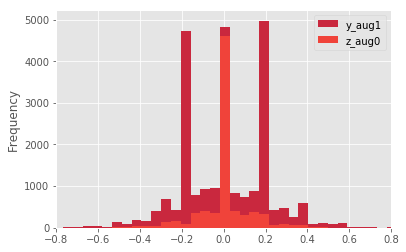

In [56]:
# In[x]: --------------------------------------------
dic1 = {'z_aug0': steering, 'y_aug1': angles}
dfr1 = pandas.DataFrame(dict([ (u,pandas.Series(v)) for u,v in dic1.items() ]))
plt.figure();
dfr1.plot.hist(xlim=(-0.8, 0.8), color=('#C9283E', '#F0433A'), bins=50)

#### 1.3. Distribution: data augmentation - part 2

In [42]:
# In[x]: --------------------------------------------
delta=0.25
augmented_angles = []
for angle in angles:
    augmented_angles.append(angle)  
    if np.random.rand() < 0.5:
        # Adjust the steering angle for flipt image 
        augmented_angles.append(angle*(-1.0))

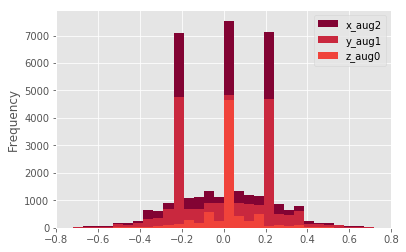

In [43]:
# In[x]: --------------------------------------------
dic2 = {'z_aug0': steering, 'y_aug1': angles, 'x_aug2': augmented_angles}
dfr2 = pandas.DataFrame(dict([ (u,pandas.Series(v)) for u,v in dic2.items() ]))
plt.figure();
dfr2.plot.hist(xlim=(-0.8, 0.8), color=('#820333','#C9283E', '#F0433A'), bins=50)

#### 1.4. Finte tune: delta = 0.25

z_aug0 : { sample: initial data }   
y_aug1 : { angles: use of left and right images to recover from the side to the center }   
x_aug2 : { augmented_angles: flipt image }

In [44]:
# In[x]: --------------------------------------------   
shuffle(steering)
delt2=0.25
angl2s = []
    
for angl2 in steering:
    # Import labels
    for i in range(3):
        if   i == 1: # images from the left
            angl2s.append(angl2+delt2)
        elif i == 2: # images from the right
            angl2s.append(angl2-delt2)
        else: # images from the center
            angl2s.append(angl2)
            
augmented_angl2s = []
for angl2 in angl2s:
    augmented_angl2s.append(angl2)  
    if np.random.rand() < 0.5:
        # Adjust the steering angle for flipt image 
        augmented_angl2s.append(angl2*(-1.0))

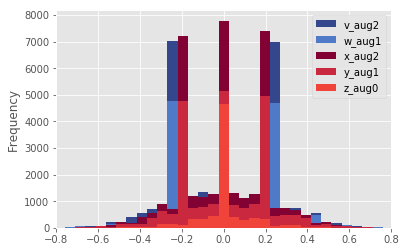

In [66]:
# In[x]: --------------------------------------------
dic3 =  {'z_aug0': steering,'y_aug1': angles, 'w_aug1': angl2s, 'x_aug2': augmented_angles, 'v_aug2': augmented_angl2s}
dfr3 = pandas.DataFrame(dict([ (u,pandas.Series(v)) for u,v in dic3.items() ]))
plt.figure();
dfr3.plot.hist(xlim=(-0.8, 0.8), color=('#35478C', '#4E7AC7','#820333','#C9283E', '#F0433A'), bins=50)

# ANNEXE

### NEW CODE

In [ ]:
# DELETE
index = 2500
plt.imshow(read_image(center, index,pathData3))
read_angle(steering, index)

In [ ]:
# DELETE
def debugTrace(str0,ope0, count0, frep0=100, activate=True): # DELETE
    if activate and count0%frep0 == 0:
        print()
        print(str0+' : {}'.format(ope0))
        #print()

In [ ]:
# Read steering angles
source_path = center[]
filename = source_path.split('\\')[-1] # ('/')[-1] # file name
current_path = pathData3 + filename

In [ ]:
def shift_horizontal(list1, list2, list3, list4, list5, list6, pXl=pXl, path=pathData3):    
    '''
    ex:
    shift_horizontal(list1=center, list2=steering,
                     list3=images_turn_right, list4=images_turn_left,
                     list5=angles_turn_right, list6=angles_turn_left,
                     pXl=pXl, path=pathData3)
    return list3, list4, list5, list6
    '''
    for i in range( int(len(list1)-len(list3)) ):
        index = random.randint(0,len(list1)-1)
        
        xPxl, count = 0, 0
        while xPxl==0:
            xPxl = random.randint(-pXl, pXl)
            count += 1
            if count > 3:
                xPxl = pXl
                break
                
        # Read images
        source_path  = list1[index]
        filename     = source_path.split('\\')[-1]
        current_path = path + filename
        image        = cv2.imread(current_path)
        
        rows, cols, ch = image.shape       
        
        M = np.float32([[1,0,xPxl],[0,1,0]])
        image = cv2.warpAffine(image,M,(cols,rows))

        if   xPxl > 0:
            list3.append(image)
            list5.append(list2[index]+pxlRate*xPxl)
        elif xPxl < 0:
            list4.append(image)
            list6.append(list2[index]+pxlRate*xPxl)

    return list3, list4, list5, list6

In [ ]:
images_turn_right, images_turn_left, angles_turn_right, angles_turn_left = shift_horizontal(center, steering, images_turn_right, images_turn_left, angles_turn_right, angles_turn_left, pXl)

In [ ]:
images_turn_left, images_turn_right, angles_turn_left, angles_turn_right = shift_horizontal(center, steering, images_turn_left, images_turn_right, angles_turn_left, angles_turn_right, pXl)

In [ ]:
len(angles_turn_right)

In [ ]:
dic0 = {'steering': steering, 'angles_turn_right': angles_turn_right, 'angles_turn_left': angles_turn_left}
df10 = pandas.DataFrame.from_dict(dic0, orient='index')
df10.transpose()

plt.figure();
df10.plot.hist(stacked=True, bins=20)

In [ ]:
# CODE TO KEEP
while True: # Loop forever so the generator never terminates
    center, left, right, steering, throttle, brake, speed = shuffle(center, left, right, steering, throttle, brake, speed)
       
    for offset in range(0, num_lines, batch_size):  # range(0, 100, batch_size):
        batch_lines = range(offset,offset+batch_size)
        
        # Import images and labels
        images, images_center, images_turn_left, images_turn_right, images_addon_right, images_addon_left = [],[],[],[],[],[]
        angles, angles_center, angles_turn_left, angles_turn_right, angles_addon_right, angles_addon_left = [],[],[],[],[],[]
        
        for batch_sample in batch_lines: # batch_lines = range(offset,offset+batch_size)
            # Read steering angle and image
            angle        = float(steering[batch_sample])
            image_center = cv2.imread(pathData3 + center[batch_sample].split('\\')[-1])
            image_left   = cv2.imread(pathData3 +   left[batch_sample].split('\\')[-1])
            image_right  = cv2.imread(pathData3 +  right[batch_sample].split('\\')[-1])
            
            # Crop images > [65,320,3]  (to spare the RAM and speedup the computation)         
            image_center, image_left, image_right = image_center[70:-25, :, :], image_left[70:-25, :, :], image_right[70:-25, :, :]
            
            # Resize, http://tanbakuchi.com/posts/comparison-of-openv-interpolation-algorithms/
            image_center = cv2.resize(image_center, (image_width, image_height), cv2.INTER_AREA)
            image_left   = cv2.resize(image_left  , (image_width, image_height), cv2.INTER_AREA)
            image_right  = cv2.resize(image_right , (image_width, image_height), cv2.INTER_AREA)
            
            # Rebalance data: [0 : 'center', 1 : 'left', 2 : 'right', 3 : 'steering']
            if   angle > 0.15:
                # Recovery: turn right > left camera
                images_turn_right.append(image_left)
                angles_turn_right.append(angle+delta)  
                # Flip the image and adjust the steering angle: center vs (left, right)
                images_addon_left.append(cv2.flip(images_turn_right[-1],1))
                angles_addon_left.append(angles_turn_right[-1]*(-1.0))
            elif angle < -0.15:  
                # Recovery: turn left > right camera
                images_turn_left.append(image_right)
                angles_turn_left.append(angle-delta)
                # Flip the image and adjust the steering angle: center vs (left, right)
                images_addon_right.append(cv2.flip(images_turn_left[-1],1))
                angles_addon_right.append(angles_turn_left[-1]*(-1.0))
            else:
                # Center > import images and output labels (steering angles)
                images_center.append(image_center)
                angles_center.append(angle)
            
        # Merge
        images_turn_right, angles_turn_right = images_turn_right + images_addon_right, angles_turn_right + angles_addon_right
        images_turn_left, angles_turn_left   = images_turn_left + images_addon_left, angles_turn_left + angles_addon_left

        # Translate
        images_turn_right, images_turn_left, angles_turn_right, angles_turn_left = shift_horizontal(center, steering, images_turn_right, images_turn_left, angles_turn_right, angles_turn_left, pXl)
        images_turn_left, images_turn_right, angles_turn_left, angles_turn_right = shift_horizontal(center, steering, images_turn_left, images_turn_right, angles_turn_left, angles_turn_right, pXl)
        
        # Merge
        images = images_center + images_turn_left + images_turn_right 
        angles = angles_center + angles_turn_left + angles_turn_right
        
        # Randomly change brightness (to simulate day and night conditions) / hsv: hue, saturation, value
        augmented_images, augmented_angles = [], []
        for image, angle in zip(images,angles):
            if np.random.rand() < 0.5:
                image  = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
                rate   = 1.0 + 0.4 * (np.random.rand() - 0.5)
                image[:,:,2] =  image[:,:,2] * rate
                image  = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
            # if np.random.rand() < 0.5:
            #     # Randomly shear the image
            #     delta = np.random.randint(-100,100)
            #     pts1  = np.float32([[0,image_height],[image_width, image_height],[image_width/2,image_height/2]])
            #     pts2  = np.float32([[0,image_height],[image_width, image_height],[image_width/2+delta,image_height/2]])   
            #     M     = cv2.getAffineTransform(pts1,pts2)
            #     image = cv2.warpAffine(image,M,(image_width, image_height),borderMode=1)
            #     angle+= delta/(image_height/2) * 360/(2*np.pi*25.0) / 6.0
            # Add to the list
            augmented_images.append(image)
            augmented_angles.append(angle)

        # Convert images and labels into np.array
        X_train = np.array(augmented_images)  # X_train.shape = (143, 32, 155, 3)
        y_train = np.array(augmented_angles)
        
        X_train, y_train = shuffle(X_train, y_train)
        
        

In [ ]:
len(angles_turn_right)

In [ ]:
dic0 = {'steering': steering, 'angles_turn_right': angles_turn_right, 'angles_turn_left': angles_turn_left}
df10 = pandas.DataFrame.from_dict(dic0, orient='index')
df10.transpose()

plt.figure();
df10.plot.hist(stacked=True, bins=20)

In [ ]:
# CODE TO KEEP
while True: # True <- # update change before testing in real data # Loop forever so the generator never terminates
    center, left, right, steering, throttle, brake, speed = shuffle(center, left, right, steering, throttle, brake, speed)
       
    for offset in range(0, 100, batch_size):  # range(0, num_lines, batch_size):  # update change before testing in real data
        batch_lines = range(offset,offset+batch_size)
        
        # Import images and labels
        images, images_center, images_turn_left, images_turn_right, images_addon_right, images_addon_left = [],[],[],[],[],[]
        angles, angles_center, angles_turn_left, angles_turn_right, angles_addon_right, angles_addon_left = [],[],[],[],[],[]
        
        for batch_sample in batch_lines: # batch_lines = range(offset,offset+batch_size)
            # Read steering angles
            angle = float(steering[batch_sample])
            
            # Rebalance data: [0 : 'center', 1 : 'left', 2 : 'right', 3 : 'steering']
            if   angle > 0.15:
                # Recovery: turn right > left camera
                images_turn_right.append(cv2.imread(pathData3 + left[batch_sample].split('\\')[-1]))
                angles_turn_right.append(angle+delta)  
                # Flip the image and adjust the steering angle: center vs (left, right)
                images_addon_left.append(cv2.flip(images_turn_right[-1],1))
                angles_addon_left.append(angles_turn_right[-1]*(-1.0))
            elif angle < -0.15:  
                # Recovery: turn left > right camera
                images_turn_left.append(cv2.imread(pathData3 + right[batch_sample].split('\\')[-1]))
                angles_turn_left.append(angle-delta)
                # Flip the image and adjust the steering angle: center vs (left, right)
                images_addon_right.append(cv2.flip(images_turn_left[-1],1))
                angles_addon_right.append(angles_turn_left[-1]*(-1.0))
            else:
                # Center > import images and output labels (steering angles)
                images_center.append(cv2.imread(pathData3 + center[batch_sample].split('\\')[-1]))
                angles_center.append(angle)
            
            ### . merge
        images_turn_right, angles_turn_right = images_turn_right + images_addon_right, angles_turn_right + angles_addon_right
        images_turn_left, angles_turn_left   = images_turn_left + images_addon_left, angles_turn_left + angles_addon_left

            ## . Translate
        images_turn_right, images_turn_left, angles_turn_right, angles_turn_left = shift_horizontal(center, steering, images_turn_right, images_turn_left, angles_turn_right, angles_turn_left, pXl)
        images_turn_left, images_turn_right, angles_turn_left, angles_turn_right = shift_horizontal(center, steering, images_turn_left, images_turn_right, angles_turn_left, angles_turn_right, pXl)
        
        # Merge
        images = images_center + images_turn_left + images_turn_right 
        angles = angles_center + angles_turn_left + angles_turn_right
        
        
        # Cropping and resizing
        augmented_images, augmented_angles = [], []
        for image, angle in zip(images,angles):
            # Crop
            image = image[70:-25, :, :]    # (65,320,3)
            # Resize, http://tanbakuchi.com/posts/comparison-of-openv-interpolation-algorithms/
            image = cv2.resize(image, (image_width, image_height), cv2.INTER_AREA)
            # Save
            augmented_images.append(image) # (32,155,3)
            augmented_angles.append(angle)

            if np.random.rand() < 0.5:
                # Randomly change brightness (to simulate day and night conditions)
                image  = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) # hsv: hue, saturation, value
                rate   = 1.0 + 0.4 * (np.random.rand() - 0.5)
                image[:,:,2] =  image[:,:,2] * rate
                image  = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
            # if np.random.rand() < 0.5:
            #     # Randomly shear the image
            #     delta = np.random.randint(-100,100)
            #     pts1  = np.float32([[0,image_height],[image_width, image_height],[image_width/2,image_height/2]])
            #     pts2  = np.float32([[0,image_height],[image_width, image_height],[image_width/2+delta,image_height/2]])   
            #     M     = cv2.getAffineTransform(pts1,pts2)
            #     image = cv2.warpAffine(image,M,(image_width, image_height),borderMode=1)
            #     angle+= delta/(image_height/2) * 360/(2*np.pi*25.0) / 6.0
            # Add to the list
            augmented_images.append(image)
            augmented_angles.append(angle)

        # Convert images and labels into np.array
        X_train = np.array(augmented_images)  # X_train.shape = (143, 32, 155, 3)
        y_train = np.array(augmented_angles)
        
        X_train, y_train = shuffle(X_train, y_train)
        
        

In [ ]:
# In[x]: --------------------------------------------
dic3 = {'steering': steering, 'angles': angles, 'augmented_angles': augmented_angles}
dfr3 = pandas.DataFrame.from_dict( dic3, orient='index' )
dfr3.transpose()
plt.figure();
dfr3.plot.hist(xlim=(-0.8, 0.8), stacked=True, bins=50)


In [ ]:
# DELETE
# ---
d0 = dict([ (u,pandas.Series(v)) for u,v in dic3.items() ])
# ---
a = []
for i in range(0,100,3):
    a.append(i)
b = pandas.Series(a)
# ---
count = 0
for u,v,w in dic3.keys():
    if count%1000 == 0:
        print('u: {} , v: {} , w: {}'.format(u,v,'w'))
    count +=1
# ---
dic3 = {'steering': steering, 'angles': angles , 'augmented_angles': augmented_angles}
dfr3 = pandas.DataFrame(dict([ (u,pandas.Series(v), pandas.Series(w)) for v,v,w in dic3.items() ]))
plt.figure();
dfr3.plot.hist(xlim=(-0.8, 0.8), bins=50)
# ---
plt.figure();
dfr3.plot.hist(xlim=(-0.8, 0.8), stacked=True, bins=50)
# ---
#len(steering) # 8035
len([1 for i in steering if (i < 0.039) and (i > -0.039)]) # 4360  4451
#len(np.unique(steering)) # 124
# ---
k = 5 # { 1: 4531; 2: 361; 3: 277; 4: 189; 5: 479 }
len([1 for i in steering if (i >= 0.039*(k-1)) and (i < 0.039*k)]) 
# ---
a = min(steering)
b = max(steering)
print('[{};{}]'.format(a,b))
# ---
#(b-a)/50
0.039*2
# ---
dic0 = {'steering': steering}
df10 = pandas.DataFrame.from_dict(dic0, orient='index')
df10.transpose()
# ---

# ---
data.groupby('class').plas.hist(alpha=0.4)

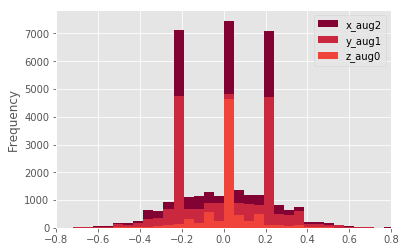

In [37]:
# In[x]: --------------------------------------------
dic2 = {'z_aug0': steering, 'y_aug1': angles, 'x_aug2': augmented_angles}
dfr2 = pandas.DataFrame(dict([ (u,pandas.Series(v)) for u,v in dic2.items() ]))
plt.figure();
dfr2.plot.hist(xlim=(-0.8, 0.8), color=('#820333','#C9283E', '#F0433A'), bins=50)